In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import control as ctl
import scipy, joblib

# IMPORTANDO MODELO

In [252]:
class StatesUpdater:
    buffer  = None
    initial = 0
    size    = 0

    def __init__(self, size, initial=0):
        self.initial = initial
        self.size    = size
        self.buffer  = initial * np.ones(size)
        
    def update(self, value):
        for i in range(self.size-1, 0, -1):
            self.buffer[i] = self.buffer[i-1]

        self.buffer[0] = value
        return self.buffer
    

states = StatesUpdater(3)
for i in range(1, 5): print(states.update(i))

[1. 0. 0.]
[2. 1. 0.]
[3. 2. 1.]
[4. 3. 2.]


In [ ]:
import warnings

class System:
    states = None
    model  = None

    def __init__(self, size, model, initial=0):
        warnings.filterwarnings('ignore', category=UserWarning)
        self.states = StatesUpdater(size, initial) 
        self.model  = model
        
    def predict(self, value):
        xData = np.array([self.states.update(value)])
        return self.model.predict(xData)[0]
    
    def simulate(self, uData):
        return [self.predict(u) for u in uData]


model = joblib.load('../Model/model.pkl')
model

KNeighborsRegressor()

986.4


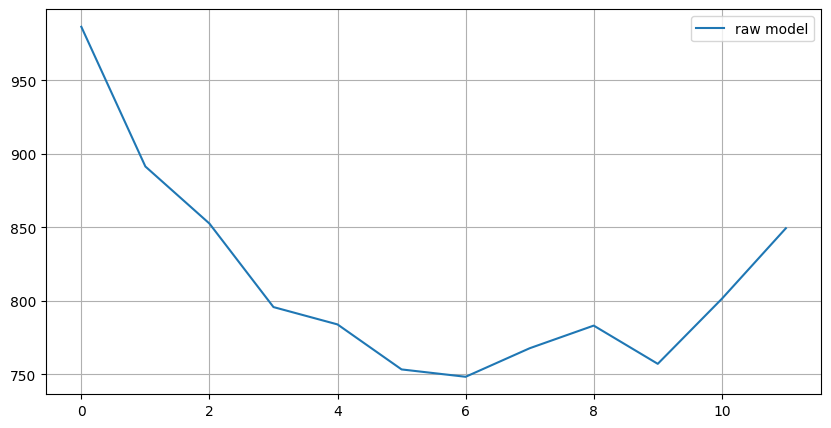

In [254]:
size   = 10
system = System(size, model)

input  = [0, 100, 50, 30, 20, 40, 50, 2, 2, 2, 2, 2]
yModel = system.simulate(input)
print(yModel[0])

plt.figure(figsize=(10, 5))
plt.plot(yModel, label='raw model')
plt.legend(), plt.grid()
plt.show()

# RESPOSTA DESEJADA

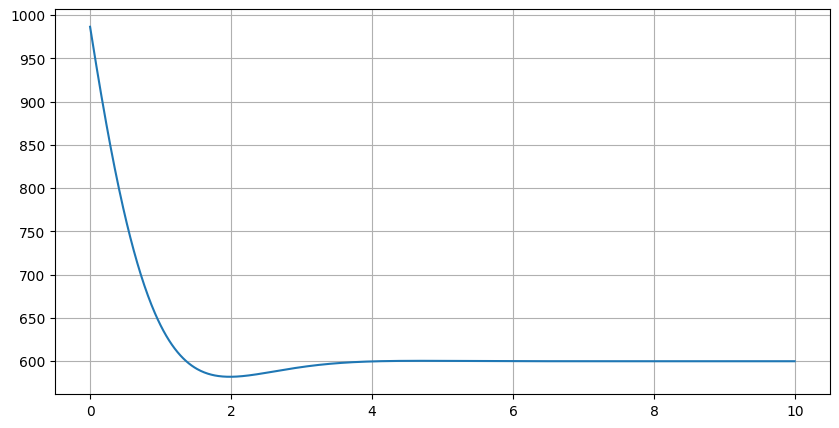

In [255]:
def getResponse(x, A, Yo, Ts, UP):
    return (A - Yo)*(-np.e**(-4/Ts*x)*np.cos(10*1.151563*UP*x) + 1) + Yo

setpoint = 600
initial  = yModel[0]
Ts = 3.0
UP = 0.1
dt = 0.01

time    = np.arange(0, 10.0, dt)
desired = [getResponse(t, setpoint, initial, Ts, UP) for t in time]

plt.figure(figsize=(10, 5))
plt.plot(time, desired)
plt.grid()

# DEFININDO CONTROLADOR

In [264]:
class Controller:
    states = None

    def __init__(self, size):
        self.states = StatesUpdater(size)

    def compute(self, error, a, b, c, d, e):
        errors = self.states.update(error)
        return errors[0]*a + errors[1]*b + errors[2]*c + errors[3]*d + e


controller = Controller(size)

In [ ]:
input  = system.predict()
output = controller.compute()